<a href="https://colab.research.google.com/github/Kwonym0814/AIvideoeditor/blob/main/03_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

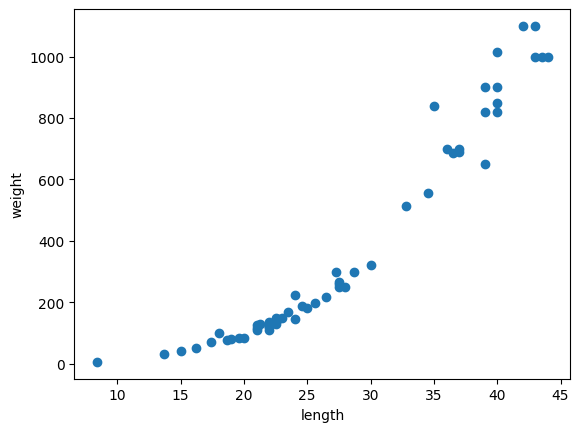

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

In [ ]:
test_array = np.array([1,2,3,4])
print(test_array.shape)

(4,)


In [ ]:
test_array = test_array.reshape(2,2)
print(test_array.shape)

(2, 2)


In [ ]:
test_array = test_array.reshape(4,1)
print(test_array)

[[1]
 [2]
 [3]
 [4]]


In [ ]:
print(test_array.shape)

(4, 1)


In [ ]:
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
knr.fit(train_input, train_target)
print(knr.score(test_input, test_target))

0.992809406101064


In [ ]:
from sklearn.metrics import mean_absolute_error
test_prediction = knr.predict(test_input)
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862


In [ ]:
print(knr.score(train_input, train_target))

0.9698823289099254


In [ ]:
knr.n_neighbors = 3

In [ ]:
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))

0.9804899950518966


In [ ]:
print(knr.score(test_input, test_target))

0.9746459963987609


In [ ]:
x = np.arange(5, 45).reshape(-1,1)

n_neighbors : 1, test_score : 0.991309195814175


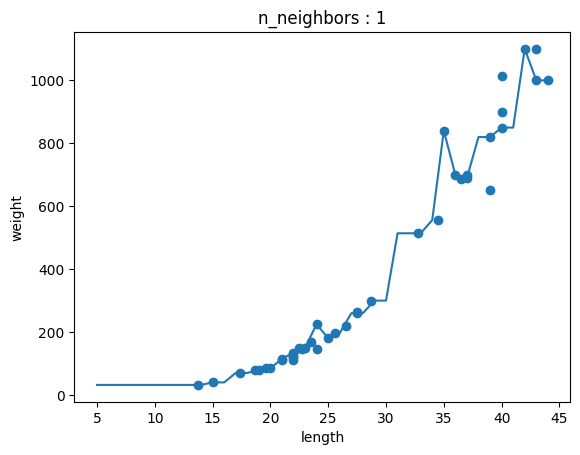

n_neighbors : 5, test_score : 0.992809406101064


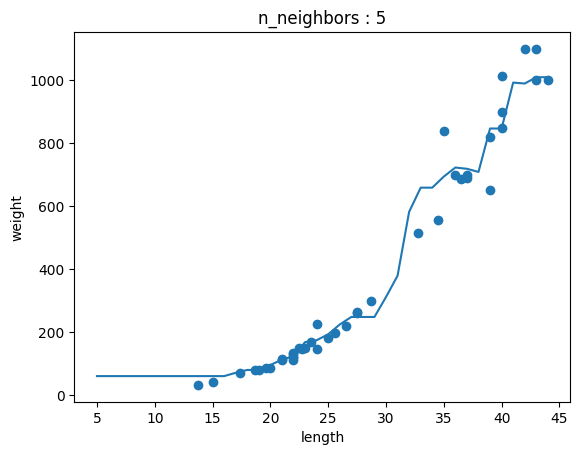

n_neighbors : 10, test_score : 0.9737908255822255


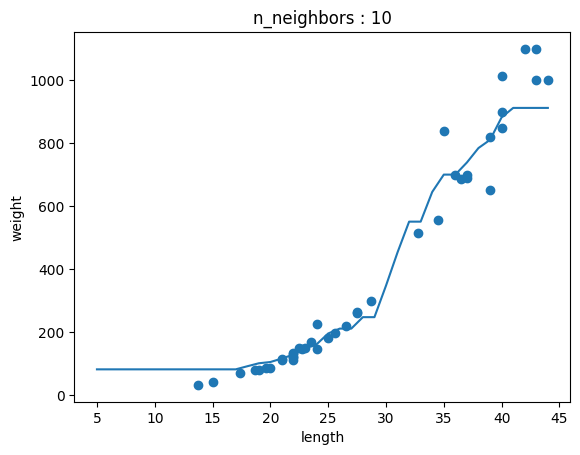

In [ ]:
for n in [1, 5, 10]:
  knr.n_neighbors = n
  knr.fit(train_input, train_target)
  score = knr.score(test_input, test_target)
  print(f'n_neighbors : {n}, test_score : {score}')

  x_prediction = knr.predict(x)
  plt.scatter(train_input, train_target)
  plt.plot(x, x_prediction)
  plt.title(f'n_neighbors : {n}')
  plt.xlabel('length')
  plt.ylabel('weight')
  plt.show()